In [ ]:
#problem statement:Develop an autoencoder to perform dimensionality reduction on the MNIST dataset. Compare the reduced representation obtained from the autoencoder with that obtained from PCA. Visualize the data in the reduced dimension and discuss the advantages of using an autoencoder over PCA. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images for PCA and Autoencoder (784 = 28x28)
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)


In [2]:
from tensorflow.keras import layers, models

# Define the autoencoder architecture
input_dim = 784
encoding_dim = 32  # Dimensionality reduction to 32 dimensions

# Encoder
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded_output = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(encoded_output)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded_output = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = models.Model(input_img, decoded_output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3349 - val_loss: 0.1658
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1578 - val_loss: 0.1369
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1350 - val_loss: 0.1252
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1242 - val_loss: 0.1176
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1177 - val_loss: 0.1130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1131 - val_loss: 0.1089
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1097 - val_loss: 0.1056
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1064 - val_loss: 0.1032
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1040 - val_loss: 0.1015
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1025 - val_loss: 0.1002
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1010 - val_loss: 0.0988
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

In [3]:
# Apply PCA to reduce the dimensions to 32 (same as autoencoder)
pca = PCA(n_components=32)
pca_result = pca.fit_transform(x_test_flat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


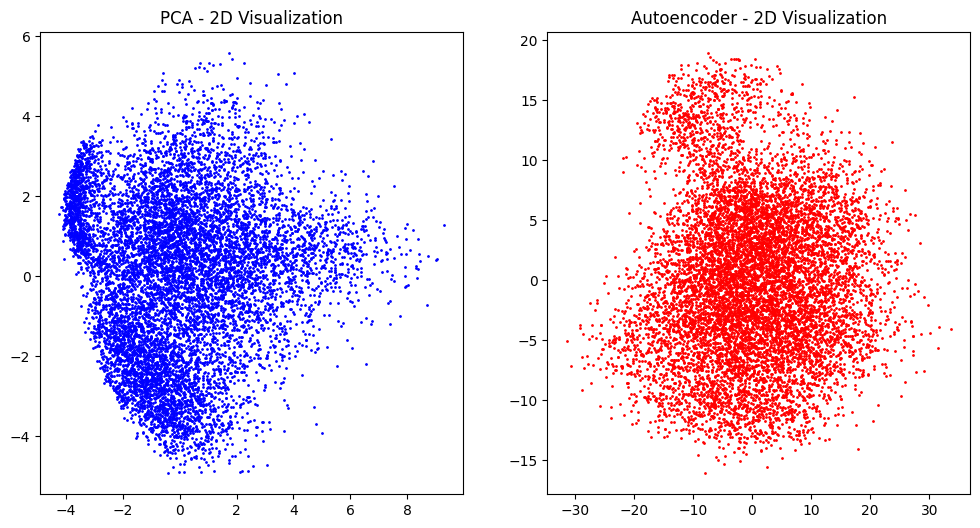

In [4]:
# Encoder model to get the reduced representation from the autoencoder
encoder = models.Model(inputs=input_img, outputs=encoded_output)

# Get reduced representation from autoencoder
autoencoder_result = encoder.predict(x_test_flat)

# Further reduce the 32 dimensions to 2D for visualization
pca_for_vis = PCA(n_components=2)
pca_result_2d = pca_for_vis.fit_transform(pca_result)
autoencoder_result_2d = pca_for_vis.fit_transform(autoencoder_result)

# Plotting the results
plt.figure(figsize=(12, 6))

# PCA 2D Visualization
plt.subplot(1, 2, 1)
plt.scatter(pca_result_2d[:, 0], pca_result_2d[:, 1], c='blue', s=1)
plt.title('PCA - 2D Visualization')

# Autoencoder 2D Visualization
plt.subplot(1, 2, 2)
plt.scatter(autoencoder_result_2d[:, 0], autoencoder_result_2d[:, 1], c='red', s=1)
plt.title('Autoencoder - 2D Visualization')

plt.show()
